<a href="https://colab.research.google.com/github/ShekSingh/AlgorithmsPartOne/blob/master/Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Fibonacci (without Recursion)

P.S - We have a recursive formula, but no recusrion. 


In [ ]:
import array
def fib(n):
    a = array.array('i',(i for i in range(0,n)))
    a[0] = 0 # O(1)
    a[1] = 1 # O(1)
    # O(N)
    for i in range(2,n):
        a[i] = a[i-1] + a[i-2] # O(1)
    return a[n-1]       
fib(7)    

array('i', [0, 1, 1, 2, 3, 5, 8])


8

In [ ]:
#1. Fibonacci (Inefficient Recursion) - solving the same small problem multiple times

In [ ]:

def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return (fib(n-1) + fib(n-2))        

In [ ]:
fib(6)

8

#2: Longest Increasing Subsequence


In [ ]:
import array
def max_lis(arr):
    n = len(arr)
    #initialize with 1 since that is the min length of an increasing subsequence
    lis = array.array('i',(1 for i in range(n)))
  
    for i in range(1,n):
        lis[0] = 1
        for j in range(0,i-1):
            if ((arr[i]> arr[j]) and (lis[i] < lis[j] + 1)):
                lis[i] = lis[j]+1
    max = 1
    for k in range(0,n):
        if lis[k] > max:
            max = lis[k]

    return max


arr = array.array('i',(0 for i in range(8)))
arr[0] = 10
arr[1] = 22
arr[2] = 9
arr[3] = 33
arr[4] = 21
arr[5] = 50
arr[6] = 41
arr[7] = 60
max_lis(arr)

4

In [ ]:
arr[1]

22

#3: Longest Common Subsequence
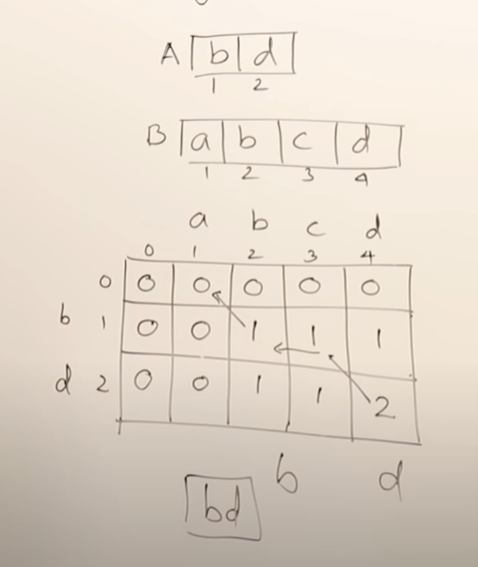

In [ ]:
import numpy as np
def max_lcs(s1, s2):
    # we need to consider the zeroes for first row and first column so adding 1 to boths lets
    s1_len = len(s1)
    s2_len = len(s2)
   
    lis = np.empty(shape=(s1_len,s2_len),  dtype=np.int8)
    lis.fill(0)
   
    #note start with 1
    for i in range(1, s1_len):
        for j in range(1,s2_len):
            if s1[i] == s2[j]:
                #take value of diagonally up
                lis[i,j] = 1 + lis[i-1,j-1]
            else:
                #take max of (value to the left, and value above)
                lis[i,j] = max(lis[i-1,j], lis[i,j-1])      
    print(lis)
    return lis[len(s1)-1,len(s2)-1]

s1 = np.chararray(3)
# need to start with empty string since we are using 1 based index so we need i=1 to point to b
s1[0] = ''
s1[1] = 'b'
s1[2] = 'd'

# need to start with empty string since we are using 1 based index so we need jc=1 to point to a
s2 = np.chararray(5)
s2[0] = ''
s2[1] = 'a'
s2[2] = 'b'
s2[3] = 'c'
s2[4] = 'd'
print(s1,s2)
max_lcs(s1,s2)


['' b'b' b'd'] ['' b'a' b'b' b'c' b'd']
[[0 0 0 0 0]
 [0 0 1 1 1]
 [0 0 1 1 2]]


2

#HW 1 Q1

1. Define Table Entries

Let T[i,j] be the length of the longest repeated subsequence, for string S of length n, 
in substrings S[i,...,n] and S[j,...,n]


2.Base Case

T[i,j] = 0 for all i<1 or j < 1 or i > n or j > n


2.Recurrence

T[i,j] = { 1 + T[i-1,j-1]   if s[i] == s[j]  and i != j

         max(T[1-j],T[i,j-1])  if s[i] != s[j] or i=j

}   for all 1 <= i <=n and 1<= j <= n


3.Pseudocode

T[.,.] = 0

for i = 1 -> n
    for j = 1 -> n
        if s[i] == s[j] and i != j then
            T[i,j] = 1 + T[i-1,j-1]
        else
            T[i,j] = max(T[i-1,j], T[i,j-1]    

return T[n,n]




4.  In order to compute the length of longest repeated subsequence in T[i,j] we need two loops to iterate over string S. With i controlling the outer loop and j controlling the innter most loop the worst case runtime complexity will be O(n^2).              

In [ ]:
import numpy as np
def max_lcs(s1):
    # we need to consider the zeroes for first row and first column so adding 1 to boths lets
    s1_len = len(s1)
   
    lis = np.empty(shape=(s1_len,s1_len),  dtype=np.int8)
    lis.fill(0)
    #note start with 1
    for i in range(1, s1_len):
        for j in range(1,s1_len):
            if (s1[i] == s1[j]) and (i != j):
                #take value of diagonally up
                lis[i,j] = 1 + lis[i-1,j-1]
            else:
                #take max of (value to the left, and value above)
                lis[i,j] = max(lis[i-1,j], lis[i,j-1])      
    print(lis)
    return lis[s1_len-1,s1_len-1]

s1 = np.chararray(5)
# need to start with empty string since we are using 1 based index so we need i=1 to point to b
s1[0] = ''
s1[1] = 'a'
s1[2] = 'b'
s1[3] = 'a'
s1[4] = 'a'
# s1[3] = 'a'


max_lcs(s1)

[[0 0 0 0 0]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 1 1 1 2]
 [0 1 1 2 2]]


2

#HW 1 Q2

In [ ]:
# import numpy as np

# def max_prod_sum(arr):
    
#     max_calc = 0
#     start_idx = 0
#     left_max = 0
#     for i in range(1,len(arr)-1):
#         # print("left :",(arr[i-1] * arr[i]) ,(arr[i-1] + arr[i]))
#         left_max = max((arr[i-1] * arr[i]) ,(arr[i-1] + arr[i]))
#         # print("right:",(arr[i-1] + arr[i]) ,(arr[i] + arr[i+1]))
#         right_max = max((arr[i-1] + arr[i]) ,(arr[i] + arr[i+1]))

#         if left_max > right_max:
#             max_calc = left_max
#             start_idx = i-1
#         else:
#             max_calc = right_max
#             start_idx = i

#         if      
#     print("throw",start_idx, start_idx+1)


# # arr = np.array([2,3,1,2])
# arr = np.array([5,2,2,2,1,2,2,3])
# #in case of index 5 where middle is 1 [2] 2 3, even though 1 X 2 is less then 2 X 2...we can't use the last 2 since 2 X 3 is greater than 2 X 2.
# max_prod_sum(arr)

1
10 4
3
4 2
5
2 4
6
4 6
17


In [ ]:
import numpy as np

def max_prod_sum(num_lst):
    sum = 0
    while (len(num_lst)):
        print(num_lst)
        overall_max = 0
        start_idx = 0
        for i in range(0,len(num_lst)-1):
            # print("left :",(arr[i-1] * arr[i]) ,(arr[i-1] + arr[i]))
            curr_max = max((num_lst[i] * num_lst[i+1]) ,(num_lst[i] + num_lst[i+1]))
        
            if curr_max > overall_max:
                overall_max = curr_max
                start_idx = i

        # if we accept negative number we can check for num_lst[0] > 0:
        print("throw",start_idx, start_idx+1)
        if len(num_lst) == 1: 
            print("mc",overall_max)
            sum = sum + num_lst[0]
            num_lst.pop(start_idx) 
        else:
            sum = sum + overall_max
            #pop the index and the one after it   
            num_lst.pop(start_idx)
            num_lst.pop(start_idx)

    print(sum)


# arr = np.array([2,3,1,2])
num_lst = [5,2,2,2,1,2,2,3]
#in case of index 5 where middle is 1 [2] 2 3, even though 1 X 2 is less then 2 X 2...we can't use the last 2 since 2 X 3 is greater than 2 X 2.
max_prod_sum(num_lst)


[5, 2, 2, 2, 1, 2, 2, 3]
throw 0 1
[2, 2, 1, 2, 2, 3]
throw 4 5
[2, 2, 1, 2]
throw 0 1
[1, 2]
throw 0 1
23


#Optimal Solution of HW1 Q2

1.Define Table Entries
Let T[i] is the largest neighbouring product sum of subarray A[i,....,n]


2.Base Case
T[i] = 0 for i > n 
T[i] = A[n] for i==n 


2.Recurrence

T[i,j] = { max (A[i] + T[i+1],  (A[i] . A[i+1]) + T[i+2])

}  for all 1 <= i < n 


3.Pseudocode

T[1,.., n+1] = 0
T[n] = A[n]

for i = n-1 -> 1
    T[i] = max (A[i] + T[i+1],  (A[i] . A[i+1]) + T[i+2])

return T[1]

4.  In order to compute the largest neighbouring product sum in T[i] we need one loop to iterate over A. With i controlling the only loop and saving the product sum in T, the worst case runtime complexity will be O(n).    

In [ ]:
import numpy as np

def max_prod_sum(num_lst):

    lnps = [0] * (len(num_lst)+1)
    n = len(num_lst) - 1
    # print(n)
    

    lnps[n] = num_lst[n]
    # print(lnps)
    for i in range(n-1,-1,-1):
        # print(i)
        # print("sum ", num_lst[i] + lnps[i+1])
        # print("mult ",(num_lst[i] * num_lst[i+1]) + lnps[i+2])
        lnps[i] = max((num_lst[i] + lnps[i+1]),((num_lst[i] * num_lst[i+1]) + lnps[i+2]))

    print(lnps[0])



num_lst = [-1,-2,-3,-4,-5,-6,-7,-8]
max_prod_sum(num_lst)

40


In [ ]:
for i in range(0,5):
    print(i)

0
1
2
3
4


#Kansack Problem without repeating items

In [17]:
import numpy as np
V = [0,1,2,5,6]
Wt = [0,2,3,4,5]
B = 8
B = B + 1
n = len(Wt)


lst = np.empty(shape=(n,B),  dtype=np.int8)
lst.fill(0)

for i in range (0,n):
    for w in range(0,B):
        #w  ==0 then capacity of bag = 0 then 0 profit
        #i ==0 then no items are included then 0 profit
        if (i==0 or w==0):
            lst[i,w] = 0
        elif (Wt[i] <= w):
           # say if column value is w is 4 and then w[i]  = 2 then we take the max of  (value of that item i.e. V[i] + value of the largest item that can fit (from above col) in i.e. so value of weight 2 (from matrix), the profit of the last item 
         # (from row above it) whose weight can also fit in  ) 
             lst[i,w] = max(V[i]+ lst[i-1,(w-Wt[i])], lst[i-1,w])
        else:
      #if weight is more than max weight for that col then copy the values from above.
             lst[i,w] =  lst[i-1,w]  

    # print(lst)

print(lst[i,w])      

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
8


#Knapsack with repeat 

In [16]:
import numpy as np
V = [0,1,2,5,6]
Wt = [0,2,3,4,5]
B = 8
B = B + 1
n = len(Wt)


lst = np.empty(shape=(B),  dtype=np.int8)
lst.fill(0)
print(lst)
for i in range (0,n):
    for w in range(0,B):
        #w  ==0 then capacity of bag = 0 then 0 profit
        # i ==0 then no items are included then 0 profit
        # print(i,w,w-Wt[i],V[i])
        if (i==0 or w==0):
            lst[w] = 0
        # if   Wt[i] <= w => if current item can fit in the bag with w max weight
        # if value in current cell at lst[w] for weight w is less than the value of item at i + value of whatever amount of capacity is left from cell lst[(w-Wt[i])]
        elif (Wt[i] <= w) and (lst[w] < (V[i] + lst[(w-Wt[i])])):
            #  print("hi")
             lst[w] =  V[i] + lst[w-Wt[i]]

print(lst)

[0 0 0 0 0 0 0 0 0]
[ 0  0  1  2  5  6  6  7 10]


#Matrix Multiplication

In [11]:
import numpy as np
import sys as sys
arr = np.array([5,4,6,2,7])
print(arr)
n = len(arr)
m = np.empty(shape=(n+1,n+1),  dtype=np.int8)
m.fill(0)
print(m)
min = sys.maxsize

# this loop controls the diff between row,col index of m, on the right side of center diagonal, to get smaller diagonals e.g. i-j = 1, i-j = 2, i-j = 3
for d in range(1,n-1):
    print("n-d",n-d)
    #n-d becuase as we move towards smaller diagolans we will need to interate through less and less i. first till 3, then till 2 and then till 1 
    for i in range(1,n-d):
        j = i+d
        print("j",i,j) 

[5 4 6 2 7]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
n-d 4
j 1 2
j 2 3
j 3 4
n-d 3
j 1 3
j 2 4
n-d 2
j 1 4
